In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

Reading the Dataset

In [ ]:
# Load the Data from csv file to Pandas DataFrame.
customer_prediction = pd.read_csv('/content/data (1).csv')

Feature Engineering

In [ ]:
# Printing the first 5 rows of the DataFrame.
customer_prediction.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [ ]:
# Number of Rows and Columns.
customer_prediction.shape

(2000, 16)

In [ ]:
# Getting some information about the Data
customer_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [ ]:
# Getting the Number of Columns.
customer_prediction.columns

Index(['year', 'customer_id', 'phone_no', 'gender', 'age',
       'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

In [ ]:
# Getting some Statistical Information about the Data.
customer_prediction.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.0,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1972.000000,2000.000000,1965.000000
mean,2015.0,554887.157500,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.250507,1.547000,0.133333
std,0.0,261033.690318,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.809084,1.315164,0.340021
min,2015.0,100198.000000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,328634.750000,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2015.0,567957.500000,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2015.0,773280.250000,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,2015.0,999961.000000,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


Dropping of Unwanted Columns.

In [ ]:
# Drop the "phone_no" Column from the DataFrame.
customer_prediction = customer_prediction.drop(columns = ['phone_no'], axis = 1)

Model Building.

Converting Categorical Columns.

In [ ]:
# Converting Categorical Columns.
customer_prediction.replace({'multi_screen':{'no' : 0, 'yes' : 1}, 'mail_subscribed':{'no' : 0, 'yes' : 1}}, inplace = True)

Handling the Missing Values.

In [ ]:
# Check the Number of missing values in each column.
customer_prediction.isnull().sum()

year                       0
customer_id                0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [ ]:
# Drop the "gender" Column from the DataFrame.
customer_prediction = customer_prediction.drop(columns = ['gender'], axis = 1)

In [ ]:
# Replacing the missing values in the "maximum_days_inactive" Column with mean value.
customer_prediction['maximum_days_inactive'].fillna(customer_prediction['maximum_days_inactive'].mode()[0], inplace = True)

In [ ]:
# Finding the Mode value of the "churn" Column.
print(customer_prediction['churn'].mode())

0    0.0
dtype: float64


In [ ]:
# Replcing the Missing Values in "churn" Column  with mode value.
customer_prediction['churn'].fillna(customer_prediction['churn'].mode()[0], inplace = True)

In [ ]:
# Check the Number of missing values in each column.
customer_prediction.isnull().sum()

year                      0
customer_id               0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

Data Visualisation

In [ ]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


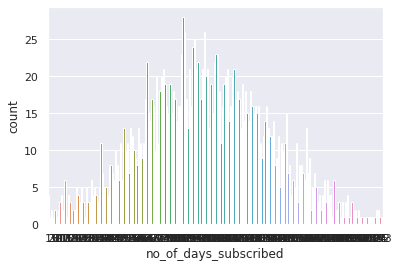

In [ ]:
# Making a countplot for "no_of_days_subscribed" Column.
sns.countplot('no_of_days_subscribed', data = customer_prediction)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


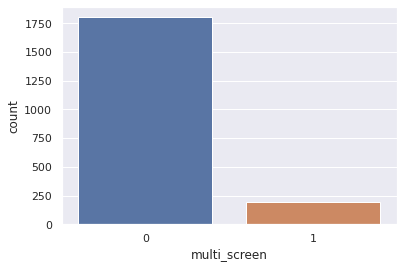

In [ ]:
# Making a countplot for "multi_screen" Column.
sns.countplot('multi_screen', data = customer_prediction)

In [ ]:
customer_prediction['multi_screen'].value_counts()

0    1802
1     198
Name: multi_screen, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


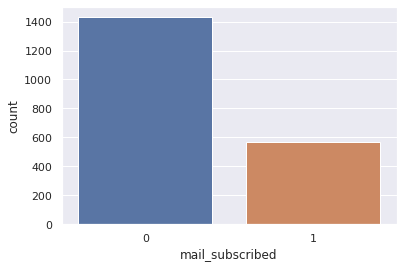

In [ ]:
# Making a countplot for "mail_subscribed" Column.
sns.countplot('mail_subscribed', data = customer_prediction)

In [ ]:
customer_prediction['mail_subscribed'].value_counts()

0    1430
1     570
Name: mail_subscribed, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


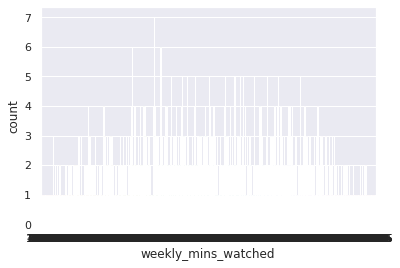

In [ ]:
# Making a countplot for "weekly_mins_watched" Column.
sns.countplot('weekly_mins_watched', data = customer_prediction)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


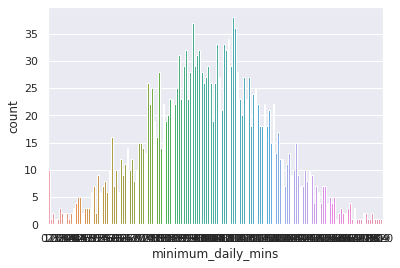

In [ ]:
# Making a countplot for "minimum_daily_mins" Column.
sns.countplot('minimum_daily_mins', data = customer_prediction)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


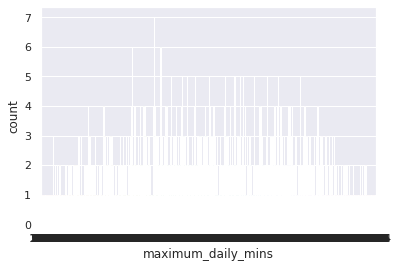

In [ ]:
# Making a countplot for "maximum_daily_mins" Column.
sns.countplot('maximum_daily_mins', data = customer_prediction)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


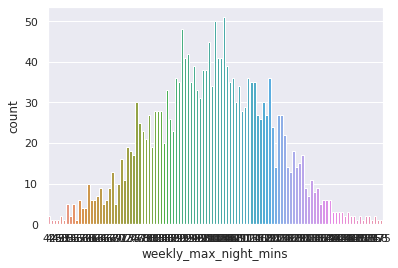

In [ ]:
# Making a countplot for "weekly_max_night_mins" Column.
sns.countplot('weekly_max_night_mins', data = customer_prediction)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


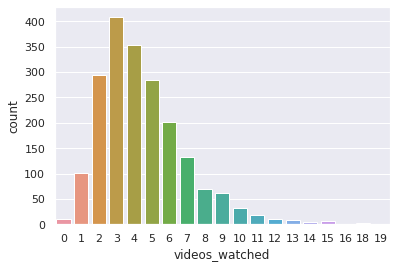

In [ ]:
# Making a countplot for "videoes_watched" Column.
sns.countplot('videos_watched', data = customer_prediction)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


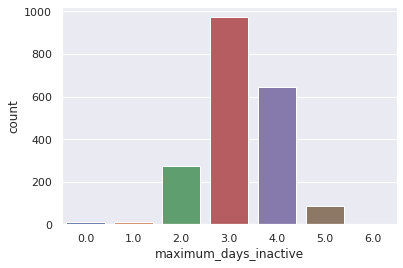

In [ ]:
# Making a countplot for "maximum_days_inactive" Column.
sns.countplot('maximum_days_inactive', data = customer_prediction)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


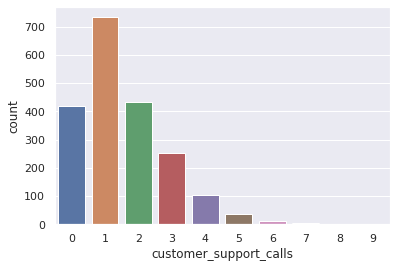

In [ ]:
# Making a countplot for "customer_support_calls" Column.
sns.countplot('customer_support_calls', data = customer_prediction)

In [ ]:
customer_prediction['customer_support_calls'].value_counts()

1    733
2    432
0    420
3    254
4    103
5     38
6     11
7      6
8      2
9      1
Name: customer_support_calls, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


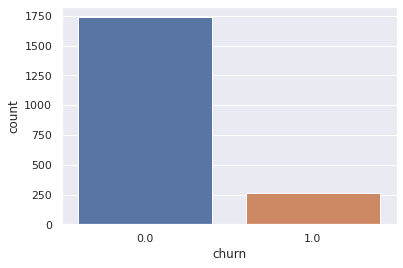

In [ ]:
# Making a countplot for "churn" Column.
sns.countplot('churn', data = customer_prediction)

In [ ]:
customer_prediction['churn'].value_counts()

0.0    1738
1.0     262
Name: churn, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


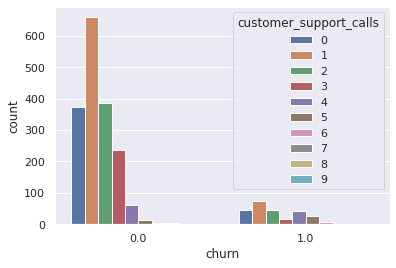

In [ ]:
# customer_support_calls VS churn.
sns.countplot('churn', hue = 'customer_support_calls', data = customer_prediction)

Separating Features and Target.

In [ ]:
X = customer_prediction.drop(columns = ['year', 'age'], axis = 1)
Y = customer_prediction['churn']

In [ ]:
print(X)

      customer_id  no_of_days_subscribed  multi_screen  mail_subscribed  \
0          100198                     62             0                0   
1          100643                    149             0                0   
2          100756                    126             0                0   
3          101595                    131             0                1   
4          101653                    191             0                0   
...           ...                    ...           ...              ...   
1995       997132                     75             0                1   
1996       998086                    127             0                0   
1997       998474                     94             0                0   
1998       998934                     94             0                0   
1999       999961                     73             0                0   

      weekly_mins_watched  minimum_daily_mins  maximum_daily_mins  \
0                  148.35     

In [ ]:
print(Y)

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    1.0
Name: churn, Length: 2000, dtype: float64


Splitting the Data into Training Data and Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 12) (1600, 12) (400, 12)


Model Training

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the Logistic Regression model with training data.
model.fit(X_train, Y_train)

LogisticRegression()

Model Validation(Predictions)

Accuracy Score

In [ ]:
# Accuracy on Training Data.
X_train_prediction = model.predict(X_train)

In [ ]:
print(X_train_prediction)

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy of Training Data : ', training_data_accuracy)

Accuracy of Training Data :  0.866875


In [ ]:
# Accuracy on Test Data.
X_test_prediction = model.predict(X_test)

In [ ]:
print(X_test_prediction)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy of Test Data : ', test_data_accuracy)

Accuracy of Test Data :  0.875


Confusing Matrix

In [ ]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

In [ ]:
truth =  Y_test
prediction = model.predict(X_test)

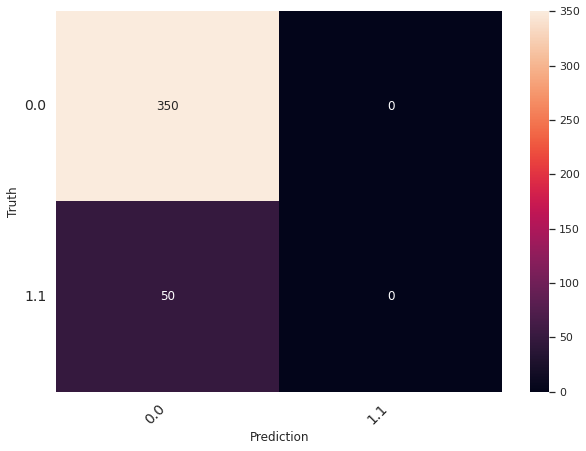

In [ ]:
# Creating a Confusion Matrix
cm = confusion_matrix(truth,prediction)
print_confusion_matrix(cm,["0.0","1.1"])

In [ ]:
# Creating a Confusion Matrix.
confusion_matrix(Y_test, model.predict(X_test))

array([[350,   0],
       [ 50,   0]])

In [ ]:
# Extracting TN, TP, FP, FN.
TN, FP, FN, TP = confusion_matrix(Y_test, model.predict(X_test)).ravel()
(TN, FP, FN, TP)

(350, 0, 50, 0)

Recall Score and Precision Score.

In [ ]:
# Confusion Matrix Metrics.
matrix = classification_report(Y_test,  model.predict(X_test))
print('Classification Report : \n', matrix)

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.88      1.00      0.93       350
         1.0       0.00      0.00      0.00        50

    accuracy                           0.88       400
   macro avg       0.44      0.50      0.47       400
weighted avg       0.77      0.88      0.82       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
